# Palooza data graphs

We are looking mostly at
1. Age
2. Hospital
3. Arrival DOW
4. Race
5. Gender
6. DXCODE

### Libraries

Added options based on site <a href="http://stackoverflow.com/questions/30920380/displaying-ggplot2-graphs-from-r-in-jupyter">here</a>

In [7]:
options(jupyter.plot_mimetypes = 'image/png')
library(ggplot2)
library(caTools)

### Get data

In [ ]:
dataPath = "C:/Users/dickm/Documents/Projects/ML/Source/UPMC/Pharmacy/visit_train_panda.csv"
visits = read.csv(dataPath)

visits$VisitID = as.factor(visits$VisitID)
visits$Hospital = as.factor(visits$Hospital)
visits$Race = as.factor(visits$Race)
visits$Gender = as.factor(visits$Gender)
visits$DXCODE = as.factor(visits$DXCODE)
visits$FC = as.factor(visits$FC)
visits$DOC = as.factor(visits$DOC)
visits$ArriveDate = as.Date(visits$ArriveDate, "%m/%d/%Y")
visits$DischargeDate = as.Date(visits$DischargeDate, "%m/%d/%Y")
visits$ArriveDateDOW = as.factor(weekdays(visits$ArriveDate))
visits$DischargeDateDOW = as.factor(weekdays(visits$DischargeDate))

### Consider outliers

From *figure 1* you can see that outliers are at around *LOS = 14*

In [10]:
visits.regular = data.frame(visits[which(visits$LOS <= 14),])
visits.outlier = data.frame(visits[which(visits$LOS > 14),])

# Part A - Viz of most dimensions againsts LOS

### Age

#### Figure 1 - LOS as function of Age et al (All)

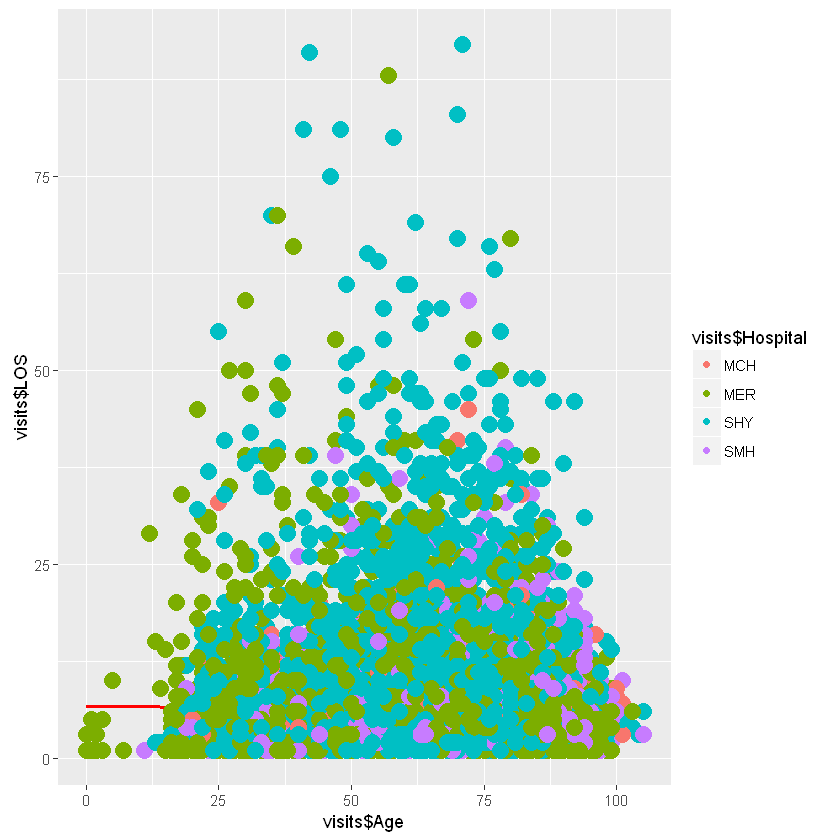

In [32]:
plot = ggplot(data=visits, aes(x=visits$Age,y=visits$LOS)) + geom_point() + geom_smooth(method = "lm", se=FALSE, color="red")
plot = plot + geom_point(aes(colour=visits$Hospital, size=1))
plot + guides(size=FALSE) # remove 

#### Figure 2 - LOS as function of Age et al  (regular)

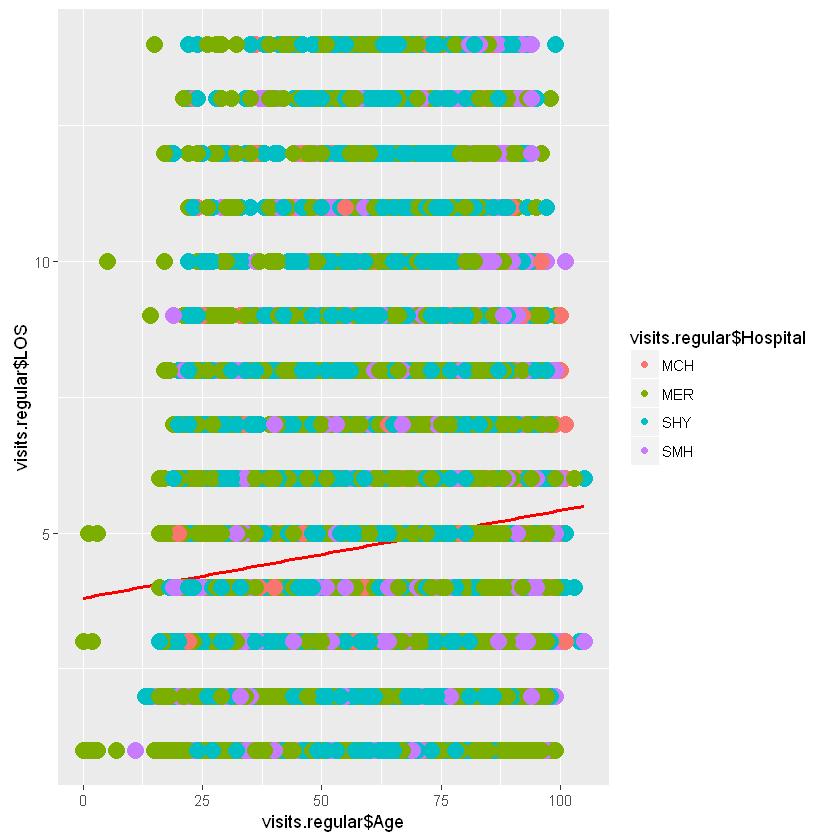

In [29]:
plot = ggplot(data=visits.regular, aes(x=visits.regular$Age,y=visits.regular$LOS)) + geom_point() + geom_smooth(method = "lm", se=FALSE, color="red")
plot = plot + geom_point(aes(colour=visits.regular$Hospital, size=1))
plot + guides(size=FALSE) # remove 

### Hospital

#### Figure 3 - LOS of a function of Hospital (All records)

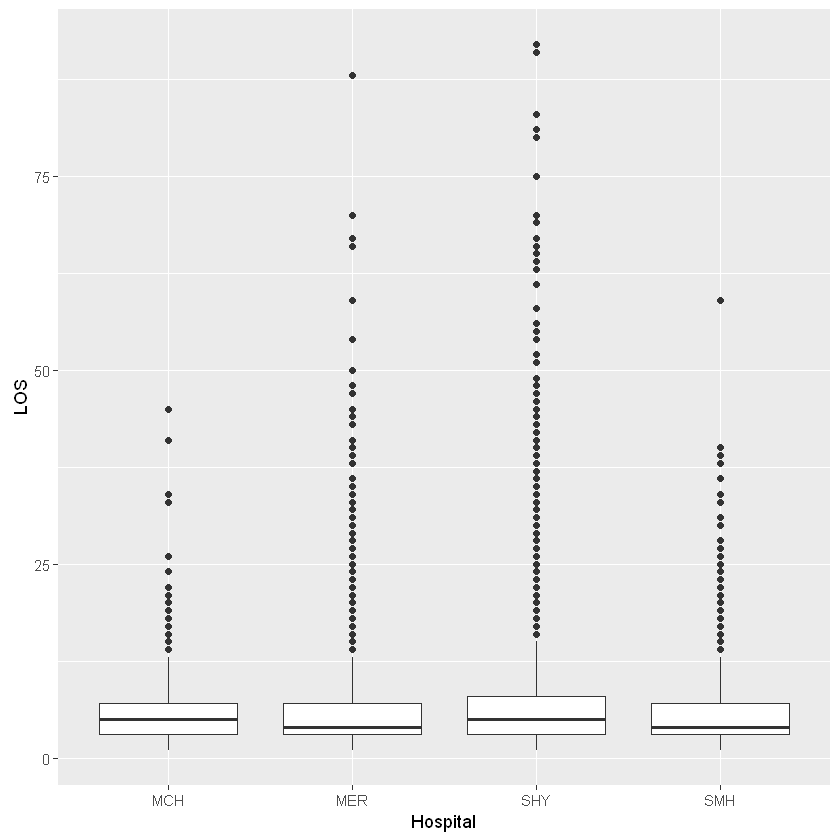

In [9]:
qplot(y = LOS, x = Hospital, data=visits, geom = "boxplot")

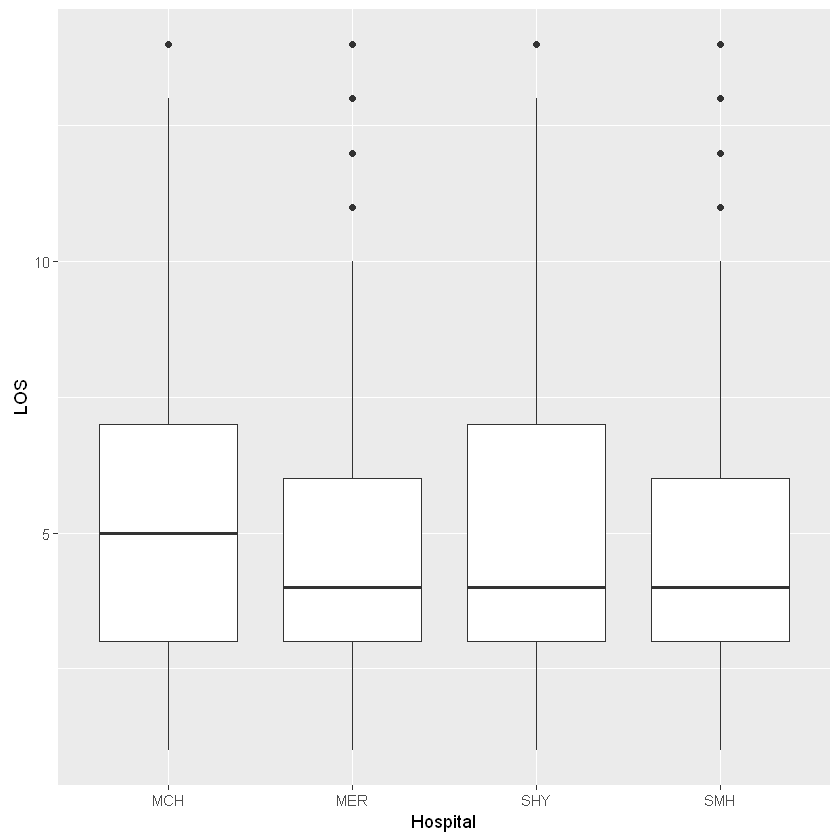

In [13]:
qplot(y = LOS, x = Hospital, data=visits.regular, geom = "boxplot")

### Race

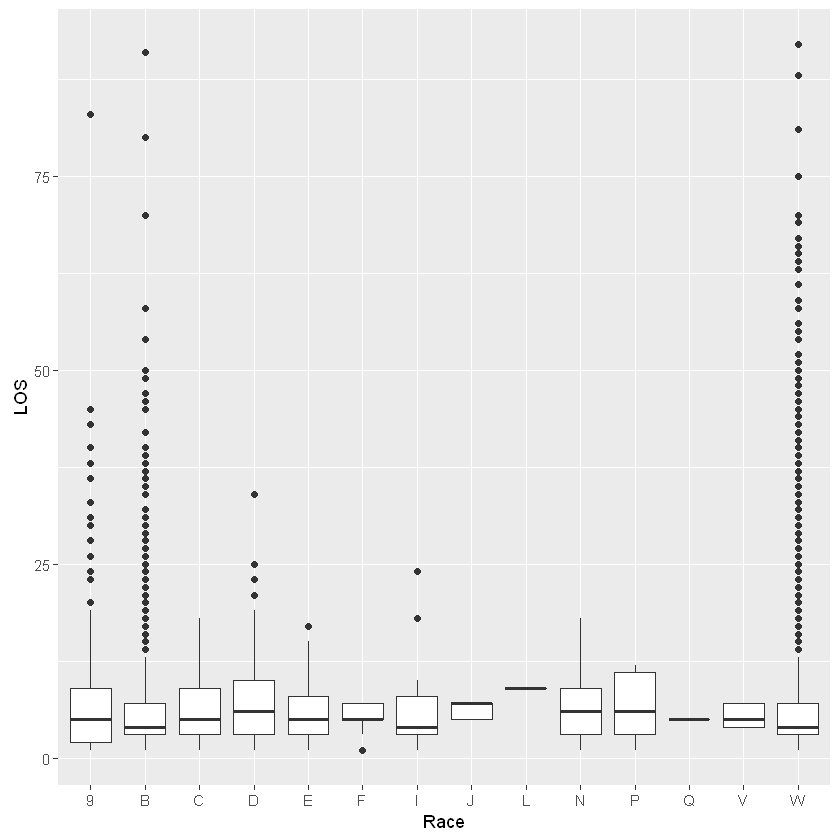

In [16]:
qplot(y = LOS, x = Race, data=visits, geom = "boxplot")

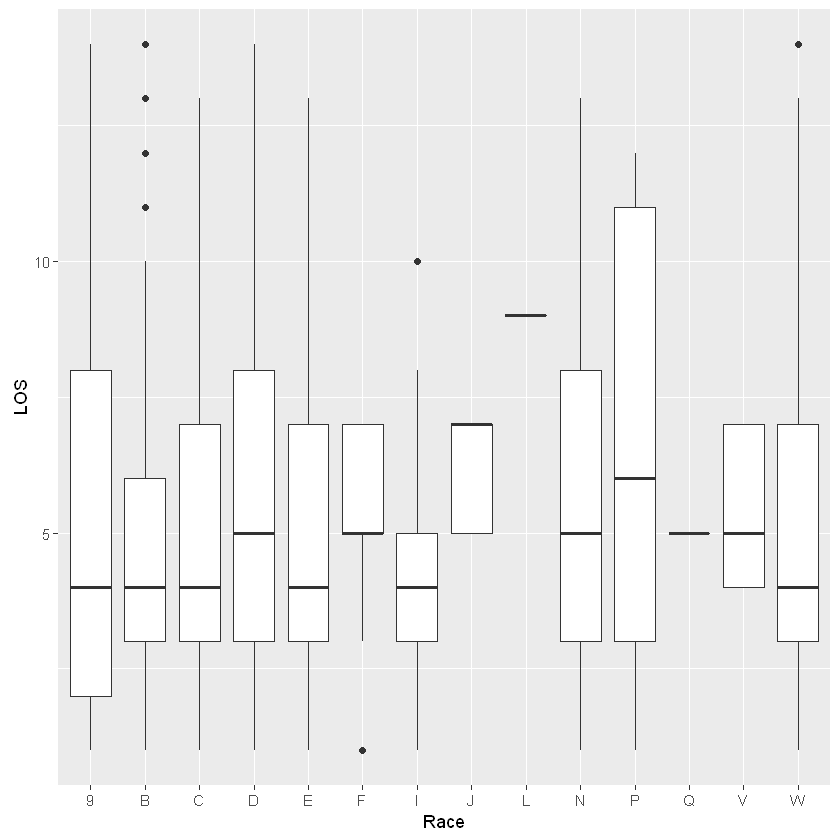

In [17]:
qplot(y = LOS, x = Race, data=visits.regular, geom = "boxplot")

### Gender

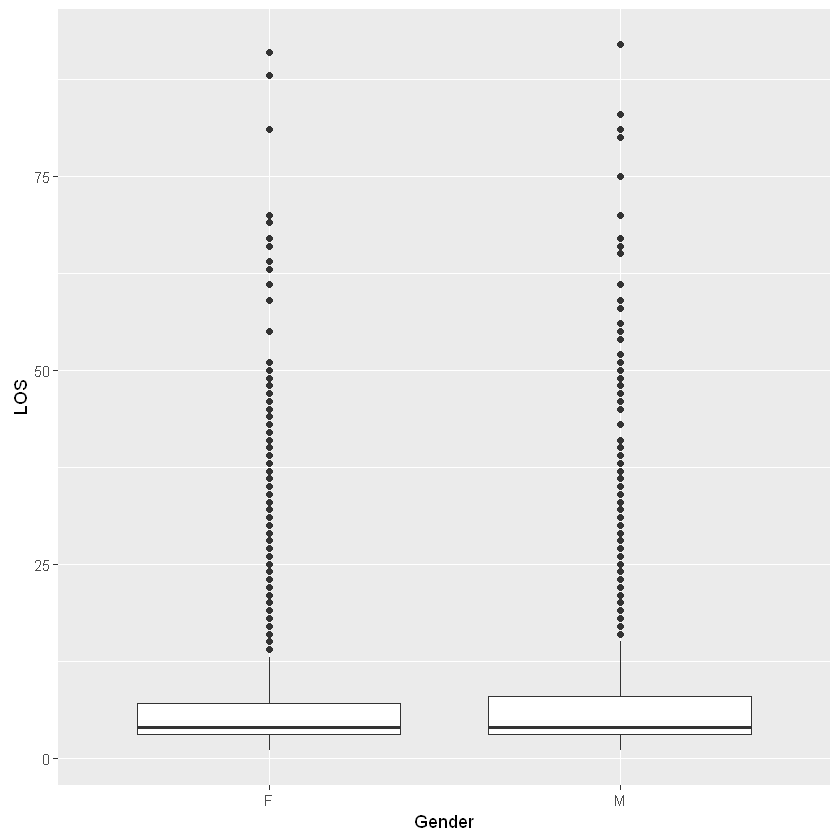

In [18]:
qplot(y = LOS, x = Gender, data=visits, geom = "boxplot")

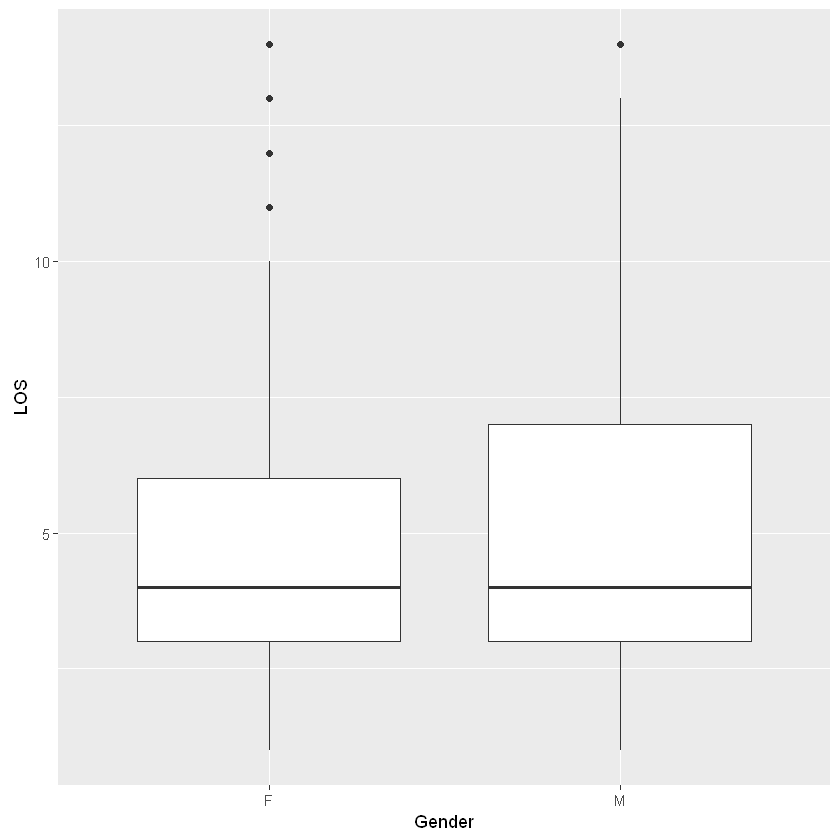

In [19]:
qplot(y = LOS, x = Gender, data=visits.regular, geom = "boxplot")

## Admitted DOW

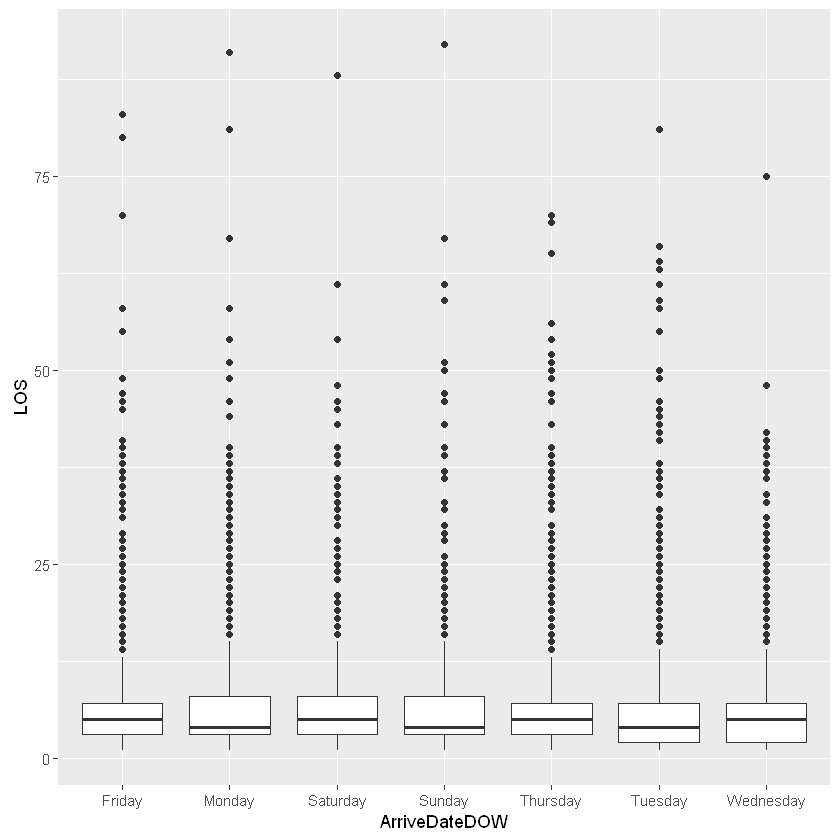

In [20]:
qplot(y = LOS, x = ArriveDateDOW, data=visits, geom = "boxplot")

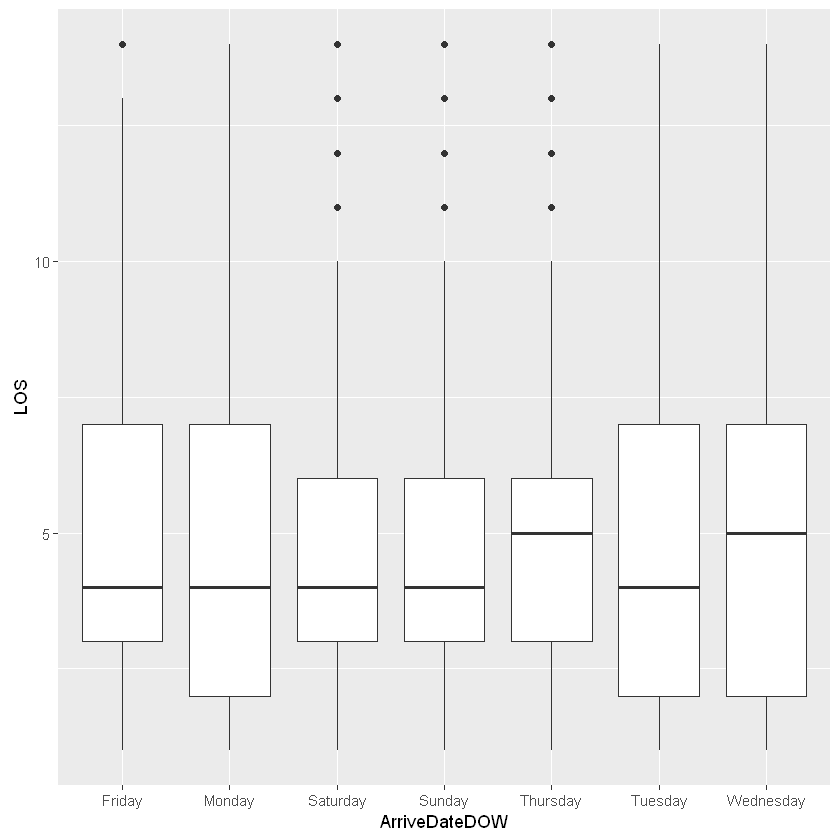

In [21]:
qplot(y = LOS, x = ArriveDateDOW, data=visits.regular, geom = "boxplot")

# Part B - Visualizing DXCODE